<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

----

# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

The Seaborn library provides easy-to-use plotting functions for common plot types, and better default visual styles.

In [2]:
import seaborn as sea

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 7)

sea.set_style('dark')

Also make the NumPy library available (without it, some features of Matplotlib and -especially- Seaborn) will *not* work:

In [4]:
import numpy as np

## SQL database connection

The ESC403 cluster comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [5]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/equidistantpoints` syntax means "connect to the PostGreSQL DB named `equidistantpoints` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [7]:
%sql postgresql://rmurri@/equidistantpoints

u'Connected: rmurri@equidistantpoints'

This database contains the [Equidistant Geographic Grid Points and Modern Climate](http://mypage.iu.edu/~pdpolly/Data.html) dataset (this the "extended North American data" in the words of the source website), imported into the PostGreSQL server running on this machine with a modified version of the [`mysql-postgresql-converter` script](https://github.com/lanyrd/mysql-postgresql-converter).

The [original publication](http://mypage.iu.edu/~pdpolly/Data.html) describes the dataset thusly:

> Database of equidistant grid points covering the globe at 25 km, 50 km, and 100 km intervals. A separate table of points just for the continent of North America is provided, with an ID that links each point into the global 50 km grid.
> 
> A detailed set of North American 50 km points is available with the following data linked to the 50 km grid by the point's ID number:
> 
> * Elevation from "TerrainBase Global Land Elevation and Ocean Depth" from the National Geophysical Data Center and World Data Centers-A for Solid Earth Geophysics and for Marine Geology and Geophysics (NGDC/WDC-A)
> * Precipitation and Temperature from "Global Air Temperature and Precipitation: Regridded Monthly and Annual Climatologies" from Wilmott, Matsuura and Legates, Center for Climatic Research, University of Delaware.
> * Macrovegetation cover from Matthews, 1984. "Prescription of Land-surface Boundary Conditions in GISS GCM II: A Simple Method Based on High-resolution Vegetation Data Sets". NASA TM-86096.
> * Ecoregions from R.G. Bailey, "Ecoregions of North America", Rocky Mountain Research Station, US Forest Service, Fort Collins, Colorado.
> * Bioclimatic variables on temperature, seasonality, precipitation, etc. from the WorldClim Global Climate Data set compiled by Hijmans et al., 2005.
>
> The gridpoints themselves and the data compilation may be cited as "Polly, P.D.  2010. Tiptoeing through the trophics: geographic variation in carnivoran locomotor ecomorphology in relation to environment.  Pp. 374-410 in A. Goswami and A. Friscia (eds.), Carnivoran Evolution: New Views on Phylogeny, Form, and Function."


Let us then explore the tables to get a "feeling" of the data here (**Note:** this query is non-standard and will only run on the PostgreSQL RDBMS):

In [8]:
%sql select table_name from information_schema.tables where table_schema = 'public';

8 rows affected.


table_name
naecoregionsbailey
natempwilmott
navegcovermatthews
na50kmpoints
naaltterrainbase
nabioclimvars
naprecipwilmott
northamerica50kmpoints


In [9]:
%sql select * from na50kmpoints limit 3;

3 rows affected.


id,globalid,longitude,latitude,lamy,lamx
1,103148,-42.17270,83.26264,0.11278,0.94127
2,103149,-38.34420,83.26264,0.11749,0.94691
3,103150,-34.51560,83.26264,0.12169,0.95277


In [10]:
%sql select * from naaltterrainbase limit 3;

3 rows affected.


id,globalid,longitude,latitude,altitude
6,None,-79.46900,82.81348,460.00000
7,None,-75.87860,82.81348,980.00000
8,None,-72.28820,82.81348,520.00000


In [11]:
%sql select * from nabioclimvars limit 3;

3 rows affected.


id,globalid,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
1,103148,-17.32920,6.45830,16.43340,1239.56640,3.80000,-35.50000,39.30000,-2.93330,-30.66670,-0.60000,-30.66670,150.00000,23.00000,7.00000,45.06160,62.00000,24.00000,52.00000,24.00000
2,103149,-16.92080,6.75830,17.24060,1230.63450,4.10000,-35.10000,39.20000,-2.61670,-28.98330,-0.35000,-30.13330,140.00000,22.00000,7.00000,45.84400,58.00000,22.00000,49.00000,23.00000
3,103150,-17.19170,6.90000,17.64710,1234.91780,3.80000,-35.30000,39.10000,-2.81670,-21.51670,-0.53330,-30.36670,141.00000,22.00000,6.00000,43.26290,57.00000,23.00000,49.00000,24.00000


In [12]:
%sql select * from navegcovermatthews limit 3;

3 rows affected.


globalid,longitude,latitude,vegid,vegdescrip
6,-79.46900,82.81300,31,ice
7,-75.87900,82.81300,31,ice
8,-72.28800,82.81300,31,ice


In [13]:
%sql select * from naprecipwilmott limit 3;

3 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annualprecip
6,-79.46900,82.81348,6.80000,4.40000,6.90000,5.00000,8.10000,7.70000,16.20000,20.50000,16.10000,10.00000,6.90000,5.50000,113.80000
7,-75.87860,82.81348,7.30000,4.60000,7.30000,5.30000,8.60000,8.10000,16.80000,20.70000,17.10000,10.10000,7.00000,6.00000,119.00000
8,-72.28820,82.81348,7.70000,4.70000,7.70000,5.80000,9.10000,8.70000,17.70000,21.10000,18.50000,10.50000,7.10000,6.50000,125.10000


----

## 1. What is the average altitude where vegetation type is "ice"?

Since vegetation type and altitude are stored in different tables, we need to perform a JOIN operation to get tuples with vegetation type and altitude for the same geographical location. Since the location is identified by the two coordinates longitude and latitude, we can use them as JOIN keys:

In [14]:
%%sql
SELECT a.longitude, a.latitude, a.altitude, b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.longitude = b.longitude AND a.latitude = b.latitude
LIMIT 3;

3 rows affected.


longitude,latitude,altitude,vegdescrip
-117.03900,41.49100,1591.00000,tall/medium/short grassland
-112.24200,41.49100,1298.00000,drought-deciduous shrubland/thicket
-107.44500,41.49100,2414.00000,tall/medium/short grassland


Now it's a simple matter of (1) restricting to the "ice" vegetation type, and (2) applying the `AVG()` aggregate function to the `altitude` column:

In [15]:
%%sql
SELECT AVG(a.altitude), b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.longitude = b.longitude AND a.latitude = b.latitude
AND b.vegdescrip = 'ice' GROUP BY b.vegdescrip
LIMIT 3;

0 rows affected.


avg,vegdescrip


What happened?  Looking back at the data in the two tables, it seems that longitude and latitude do not match exactly: coordinates in table `navegcovermatthews` only use a precision of 3 significant digits, whereas table `naaltterrainbase` uses 5.  We can of course try to use a "approximate equality":

In [16]:
%%time
%%sql
SELECT AVG(a.altitude), b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE ABS(a.longitude - b.longitude) < 0.001 AND ABS(a.latitude - b.latitude) < 0.001
AND b.vegdescrip = 'ice' GROUP BY b.vegdescrip
LIMIT 3;

1 rows affected.
CPU times: user 0 ns, sys: 3.87 ms, total: 3.87 ms
Wall time: 259 ms


avg,vegdescrip
903.6605504587155963,ice


However, we can also note that corresponding rows in the two tables use the same value in the `id` column. *(How can we verify this with a SQL query?)*  Thus we can use a proper equality JOIN on the `id` column, which likely results in faster code:

In [17]:
%%time
%%sql
SELECT AVG(a.altitude), b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.id = b.globalid
AND b.vegdescrip = 'ice' GROUP BY b.vegdescrip
LIMIT 3;

1 rows affected.
CPU times: user 2.45 ms, sys: 295 µs, total: 2.74 ms
Wall time: 5.01 ms


avg,vegdescrip
903.6605504587155963,ice


## 2. What is the average altitude for each vegetation type?

This is really just a slight generalization of the previous query: we just *remove* the constraint that vegetation type is "ice":

In [18]:
%%sql
SELECT AVG(a.altitude), b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.id = b.globalid
GROUP BY b.vegdescrip
LIMIT 3;

3 rows affected.


avg,vegdescrip
702.3636363636363636,evergreen broadleaved sclerophyllous forest
490.6372549019607843,tropical evergreen rainforest
1278.8956521739130435,meadow


## 3. What is the most frequent vegetation type by altitude?

Let's build this query in steps. First, we try to get all vegetation types given a certain altitude (e.g., 460m):

In [19]:
%%sql
SELECT b.vegdescrip
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.id = b.globalid AND a.altitude = 460.00
LIMIT 5;

5 rows affected.


vegdescrip
ice
ice
ice
desert
ice


By grouping on vegetation type we can see the (relative) frequency of each type:

In [20]:
%%sql
SELECT b.vegdescrip, COUNT(b.vegdescrip)
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.id = b.globalid AND a.altitude = 460.00
GROUP BY b.vegdescrip
LIMIT 3;

3 rows affected.


vegdescrip,count
tropical evergreen rainforest,2
evergreen needleleaved woodland,3
xeromorphic shrubland/dwarf shrubland,1


Now finding the most frequent vegetation type is just a matter of ordering results:

In [21]:
%%sql
SELECT b.vegdescrip, COUNT(b.vegdescrip) AS cnt
FROM naaltterrainbase AS a, navegcovermatthews AS b
WHERE a.id = b.globalid AND a.altitude = 460.00
GROUP BY b.vegdescrip
ORDER BY cnt DESC
LIMIT 1;

1 rows affected.


vegdescrip,cnt
arctic/alpine tundra,10


We can now package this query as a [user-defined function][1] that we apply to a given altitude value:

[1]: http://www.postgresql.org/docs/9.3/static/xfunc-sql.html

In [22]:
%%sql
DROP FUNCTION IF EXISTS most_frequent_vegdescrip(h numeric);

CREATE FUNCTION most_frequent_vegdescrip(h numeric) RETURNS TEXT AS $BODY$
  SELECT b.vegdescrip AS result
  FROM naaltterrainbase AS a, navegcovermatthews AS b
  WHERE a.id = b.globalid AND a.altitude = h
  GROUP BY b.vegdescrip
  ORDER BY COUNT(b.vegdescrip) DESC
  LIMIT 1;
$BODY$ LANGUAGE SQL;

Done.
Done.


[]

We can now apply this function to all altitude in a normal SELECT query: (however, note the running time!)

In [23]:
%%time
%%sql
SELECT DISTINCT altitude, most_frequent_vegdescrip(altitude)
FROM naaltterrainbase
LIMIT 3;

3 rows affected.
CPU times: user 1.83 ms, sys: 220 µs, total: 2.05 ms
Wall time: 12.2 s


altitude,most_frequent_vegdescrip
523.00000,cold-deciduous forest
843.00000,tall/medium/short grassland
281.00000,evergreen needleleaved woodland


## 4. Is there a correlation between altitude and precipitation?

We already know how to get altitude and (annual) precipitation side-by-side with an SQL JOIN:

In [24]:
%%sql

SELECT a.altitude, b.annualprecip
FROM naaltterrainbase AS a, naprecipwilmott AS b
WHERE a.id = b.id
LIMIT 3;

3 rows affected.


altitude,annualprecip
460.00000,113.80000
980.00000,119.00000
520.00000,125.10000


If a correlation exists, the ratio of these two should be *roughly* constant:

In [25]:
%%sql

SELECT DISTINCT (b.annualprecip / a.altitude) AS ratio
FROM naaltterrainbase AS a, naprecipwilmott AS b
WHERE a.id = b.id
LIMIT 5;

5 rows affected.


ratio
0.91802935010482180294
0.16638560989319842608
9.4433333333333333
0.35752539242843951985
0.24066797642436149312


Although there does not seem to exist any correlation, we can check it visually:

1. First we load all the pairs into a Python variable: 

In [26]:
pts = %sql SELECT a.altitude, b.annualprecip FROM naaltterrainbase AS a, naprecipwilmott AS b WHERE a.id = b.id;

8509 rows affected.


Then we can draw a scatter plot of these values:

In [27]:
# change from a list of pairs into a pair of lists
xs, ys = zip(* ((float(x), float(y)) for x,y in pts))

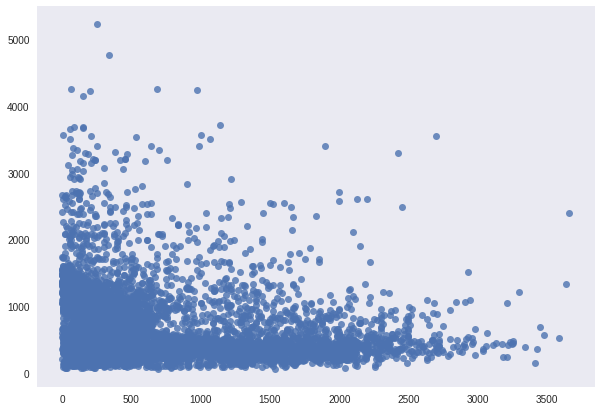

In [28]:
sea.regplot(np.array(xs), np.array(ys), scatter=True, fit_reg=False)

Alternate way of doing a scatterplot:

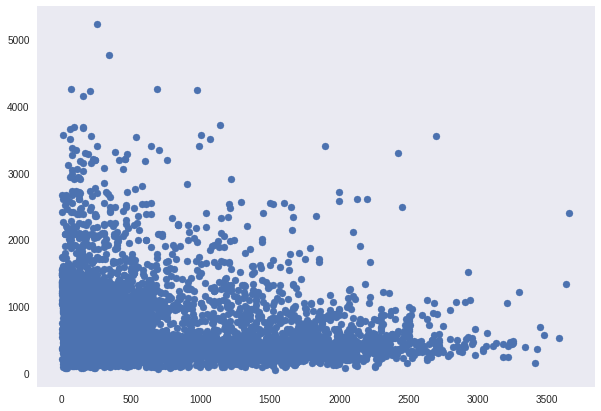

In [29]:
plt.scatter(xs, ys)

----

# Plotting geographical data

We are now going to see a sample on how to plot geographical/geospatial data.  Although libraries for cartographic projection and associated plotting have been available for Python since a few years, the APIs are still scarcely documented, and somewhat difficult/counter-intuitive to use.

We are going to use the [CartoPy](http://scitools.org.uk/cartopy/) library to do the plotting.  CartoPy provides cartographic tools on top of Python's MatPlotLib, and in particular objects and functions to show the earth surface in its [`cartopy.crs`](http://scitools.org.uk/cartopy/docs/v0.15/crs/index.html) submodule.

In [30]:
import cartopy
import cartopy.crs

We are going to use the `PlateCarree` projection from the many [available CartoPy projections](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#cartopy-projections):

In [31]:
# Create a Cartopy crs for plain  lat-lon projections.
plain_crs = cartopy.crs.PlateCarree()

The following code shows the rectangular portion of the map corresponding to longitude range -180 to -40, and latitude ranging from 10 to 80 (roughly corresponding to North America):

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


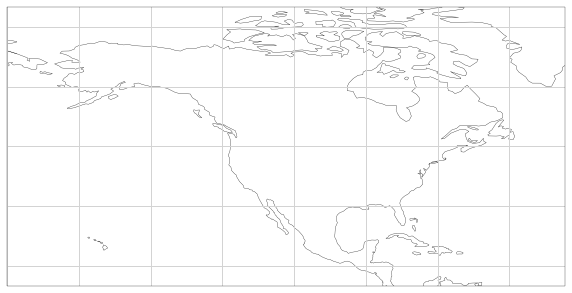

In [32]:
ax = plt.subplot(111, projection=plain_crs)
ax.set_extent((-180, -40, 10, 80), crs=plain_crs)
ax.gridlines(color='lightgrey', linestyle='-')
ax.coastlines()

For example, let us plot average temperatures in March (DB table `natempwilmott`), overlaying a dot (color shows temperature according to a "color map") over each point in the map for which we have data:

In [33]:
%sql select * from natempwilmott limit 3;

3 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,ann
6,-79.46900,82.81348,-35.00000,-37.00000,-33.00000,-24.90000,-10.00000,0.30000,3.30000,1.40000,-9.00000,-20.70000,-28.80000,-32.50000,-18.90000
7,-75.87860,82.81348,-35.00000,-37.10000,-32.80000,-24.70000,-9.90000,0.10000,3.30000,1.40000,-9.20000,-20.90000,-28.80000,-32.30000,-18.80000
8,-72.28820,82.81348,-34.90000,-36.90000,-32.70000,-24.60000,-9.90000,-0.10000,3.20000,1.30000,-9.50000,-20.90000,-28.80000,-32.00000,-18.80000


In [34]:
data = %sql SELECT longitude, latitude, mar FROM natempwilmott 

8509 rows affected.


In [35]:
data[:3]

[(Decimal('-79.46900'), Decimal('82.81348'), Decimal('-33.00000')),
 (Decimal('-75.87860'), Decimal('82.81348'), Decimal('-32.80000')),
 (Decimal('-72.28820'), Decimal('82.81348'), Decimal('-32.70000'))]

Now things start to get more complicated.

In order to overlay temperature data on the map, we need:

* longitudes of all data points, collected in a single 1D array `xs`
* latitudes of all data points, collected in a single 1D array `ys`
* a matrix (2D array) giving temperature values for each pair of coordinates from (`xs` $\times$ `ys`)

However, we only have a list of triples $(longitude, latitude, temperature)$ where longitude and latitude values (taken one by one) can be repeated (see the sample above).  A strategy for data cleaning could then be the following:

1. Create sorted arrays of (unique) longitude and latitude values
2. Create a 2D matrix for holding temperature values, with dimensions given by the size of the longitude/latitude arrays
3. Walk the list of triples and store temperature values in the appropriate slot in the matrix; use a "placeholder" value where we do not have any data.

#### 1. Created sorted arrays of unique longitude/latitude values

We can extract a list (with repeated values) of longitudes and latitudes using Python's `zip` function:

In [36]:
lon, lat, _ = zip(* data)

Converting the Python list into a Python `set` removes duplicates:

In [37]:
lon = set(lon)
lat = set(lat)

Now we can again convert to a Python `list` and then sort *in-place* to get values in the right format:

In [38]:
lon = list(lon)
lat = list(lat)

In [39]:
lon.sort()
lat.sort()

We keep the items in the list into Python's `Decimal` type for reasons that will be clear when building the 2D matrix of temperatures.  (Eventually, we'll convert both arrays to NumPy's `np.array` type, which is better for plotting.)

In [40]:
lon[:3], lat[:3]

([Decimal('-170.94039'), Decimal('-166.87923'), Decimal('-166.26217')],
 [Decimal('7.35503'), Decimal('7.80419'), Decimal('8.25335')])

#### 2. Create a 2D matrix for holding temperature values

Dimensions of the matrix are given by the number of points in the longitude and latitude arrays, which we can get with Python's `len()` function.

Let us store the dimensions into constants for better readability, as they recur over and over in the following code:

In [41]:
n_lon = len(lon)
n_lat = len(lat)

The plot has a rectangular shape (hence, a 2D matrix used to hold plot data), but we have only data for points corresponding to land (i.e., in North America, not in the Pacific Ocean).

So we need a kind of "placeholder" value to mean "no valid data here".  The mechanism provided by NumPy (and used by CartoPy) is called a [masked array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.array.html#numpy.ma.array). A masked array is given by a pair of arrays $(D, M)$ having the same *shape*, $D$ is regular data array (of any type), and $M$ is a boolean array: where $M$ holds the value `True`, the corresponding entry in $D$ is excluded from any computation.

We need to create and fill the data and mask arrays separately, and then combine them into a masked array.

In [42]:
temp_data = np.empty([n_lon, n_lat])
temp_mask = np.full(temp_data.shape, True, dtype=np.bool)  # initially, all entries are masked

#### 3. Walk the list of triples and store temperature values

Now, ideally we would just fill the arrays by browsing the list of triples and setting/unmasking the entry corresponding to the triple.  But: entries in the temperature matrix must be indexed by *index* and the triples store longitude/latitude values.  So we need to: 

1. look up the indices corresponding to the given longitude/latitude values in the `lon` and `lat` arrays
2. set and unmask the entry in the temperature matrix indicated by this pair of indices

A way to implement the look up is to use the `.index()` method of Python `list` objects (this is why we didn't convert `lon` and `lat` to NumPy arrays).  However, this is *slow* (why?)

In [ ]:
%%time

# this is SLOW!
for x, y, value in data:
    i = lon.index(x)
    j = lat.index(y)
    temp_data[i, j] = float(value)
    temp_mask[i, j] = False

A better solution (if memory allows), is to prepare a lookup table beforehand and use that instead of invoking the `.index()` method.  (In addition, this technique would have worked with NumPy arrays as well.)

In [43]:
%%time

lon_to_index = { value:idx for idx, value in enumerate(lon) }
lat_to_index = { value:idx for idx, value in enumerate(lat) }

# is this faster?
for x, y, value in data:
    i = lon_to_index[x]
    j = lat_to_index[y]
    temp_data[i, j] = float(value)
    temp_mask[i, j] = False

CPU times: user 340 ms, sys: 0 ns, total: 340 ms
Wall time: 341 ms


Now function `numpy.ma.array` can be used to build the *masked array* object:

In [44]:
temp = np.ma.array(temp_data, mask=temp_mask)

In [45]:
temp

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

In [46]:
temp.min(), temp.max()

(-36.799999999999997, 28.899999999999999)

### Plotting time!

We should now get the list of longitude and latitude coordinates as a NumPy array:

In [47]:
xs = np.array(lon, dtype=np.float)
ys = np.array(lat, dtype=np.float)

The `.pcolormesh()` method is used to overlay "color-coded" dots on a projected map; it requires three parameters (others influence plotting style):

1. array of longitudes
2. array of latitudes
3. matrix of overlay values, indexed by $(latitude, longitude)$ pairs

**Note** that the order of coordinates in the overlay matrix is the reverse of the order of coordinates in the function call; hence the use of `temp.T` (transpose of matrix `temp`) in the following code.

CPU times: user 419 ms, sys: 40 ms, total: 459 ms
Wall time: 461 ms


/opt/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:858: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


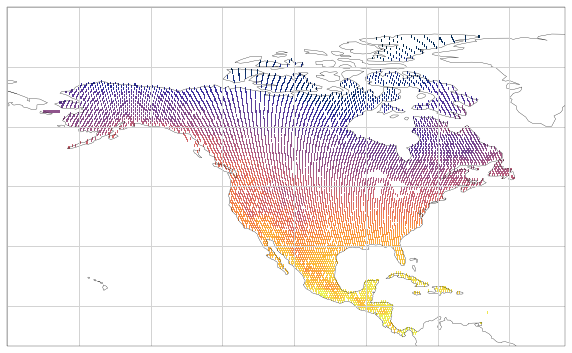

In [48]:
%%time

# this is a set of predefined colormaps
import cmocean
cm_thermal = cmocean.cm.thermal

ax = plt.subplot(111, projection=plain_crs)
ax.set_extent((-180, -40, 5, 90), crs=plain_crs)
ax.gridlines(color='lightgrey', linestyle='-')
ax.pcolormesh(xs, ys, temp.T, transform=plain_crs, cmap=cm_thermal)
ax.coastlines()